<a href="https://colab.research.google.com/github/MuhammadShaheer-khan/Forecasting-with-fbprophet/blob/main/Google_Stock_predictind_using_fb_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['GOOG.csv']))

Saving GOOG.csv to GOOG.csv


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,1105.761302,1116.684969,1095.530823,1106.531560,1106.531560,1.660817e+06
std,278.473496,283.064992,274.964670,279.127433,279.127433,7.613836e+05
min,667.849976,672.299988,663.059998,668.260010,668.260010,3.468000e+05
25%,903.029998,914.225006,899.100006,906.309998,906.309998,1.206200e+06
50%,1093.050049,1106.119995,1080.171997,1093.390015,1093.390015,1.462300e+06
75%,1241.230041,1252.402527,1232.109985,1242.159973,1242.159973,1.863350e+06
max,1920.670044,1934.859985,1887.109985,1917.239990,1917.239990,6.348100e+06


In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-02-01,750.460022,757.859985,743.270020,752.000000,752.000000,5139200
1,2016-02-02,784.500000,789.869995,764.650024,764.650024,764.650024,6348100
2,2016-02-03,770.219971,774.500000,720.500000,726.950012,726.950012,6171000
3,2016-02-04,722.809998,727.000000,701.859985,708.010010,708.010010,5168700
4,2016-02-05,703.869995,703.989990,680.150024,683.570007,683.570007,5105700


In [11]:
# Select only the important features i.e. the date and price
df = df[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
df = df.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
df.head(5)

,ds,y
0,2016-02-01,752.000000
1,2016-02-02,764.650024
2,2016-02-03,726.950012
3,2016-02-04,708.010010
4,2016-02-05,683.570007


In [13]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(df) # fit the model using all data

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


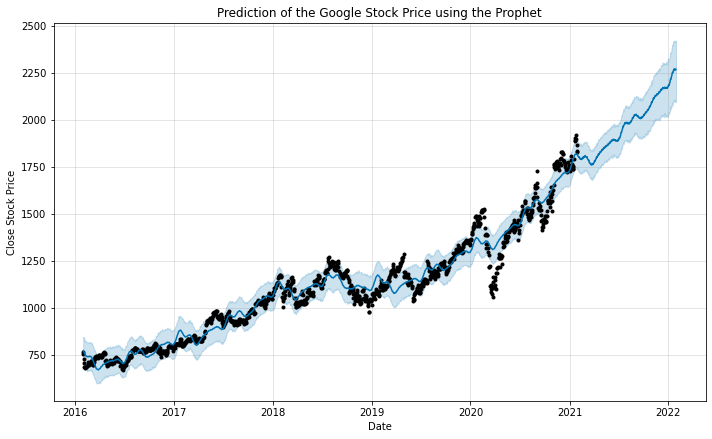

In [14]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Google Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

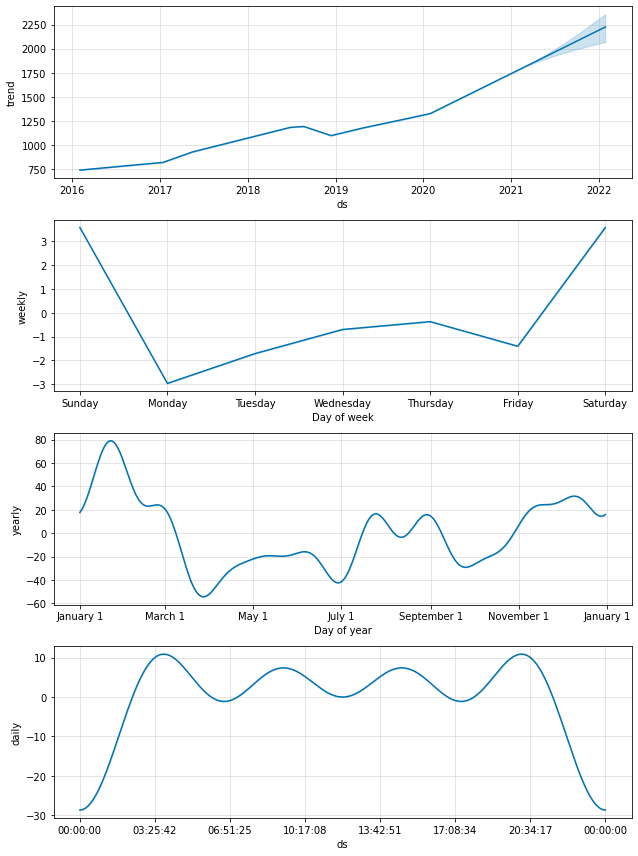

In [15]:
m.plot_components(prediction)
plt.show()

In [16]:
future.head()

,ds
0,2016-02-01
1,2016-02-02
2,2016-02-03
3,2016-02-04
4,2016-02-05


In [18]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-02-01,741.800869,700.800349,843.668654,741.800869,741.800869,29.619992,29.619992,29.619992,-28.612276,-28.612276,-28.612276,-2.962909,-2.962909,-2.962909,61.195178,61.195178,61.195178,0.0,0.0,0.0,771.420861
1,2016-02-02,742.031618,698.667550,845.260572,742.031618,742.031618,27.362094,27.362094,27.362094,-28.612276,-28.612276,-28.612276,-1.712266,-1.712266,-1.712266,57.686636,57.686636,57.686636,0.0,0.0,0.0,769.393711
2,2016-02-03,742.262367,689.513029,839.248781,742.262367,742.262367,24.784368,24.784368,24.784368,-28.612276,-28.612276,-28.612276,-0.701124,-0.701124,-0.701124,54.097767,54.097767,54.097767,0.0,0.0,0.0,767.046734
3,2016-02-04,742.493115,696.135247,841.429372,742.493115,742.493115,21.510622,21.510622,21.510622,-28.612276,-28.612276,-28.612276,-0.372525,-0.372525,-0.372525,50.495424,50.495424,50.495424,0.0,0.0,0.0,764.003737
4,2016-02-05,742.723864,688.516961,834.859665,742.723864,742.723864,16.927743,16.927743,16.927743,-28.612276,-28.612276,-28.612276,-1.404245,-1.404245,-1.404245,46.944264,46.944264,46.944264,0.0,0.0,0.0,759.651607


In [22]:
prediction.values[:5]

array([[Timestamp('2016-02-01 00:00:00'), 741.8008690239074,
        700.8003490608182, 843.6686543862353, 741.8008690239074,
        741.8008690239074, 29.61999231977151, 29.61999231977151,
        29.61999231977151, -28.61227627055857, -28.61227627055857,
        -28.61227627055857, -2.9629094599554033, -2.9629094599554033,
        -2.9629094599554033, 61.19517805028548, 61.19517805028548,
        61.19517805028548, 0.0, 0.0, 0.0, 771.4208613436789],
       [Timestamp('2016-02-02 00:00:00'), 742.031617830056,
        698.6675504188976, 845.2605716499378, 742.031617830056,
        742.031617830056, 27.362093653998677, 27.362093653998677,
        27.362093653998677, -28.61227627055857, -28.61227627055857,
        -28.61227627055857, -1.7122662071656463, -1.7122662071656463,
        -1.7122662071656463, 57.6866361317229, 57.6866361317229,
        57.6866361317229, 0.0, 0.0, 0.0, 769.3937114840547],
       [Timestamp('2016-02-03 00:00:00'), 742.2623666362048,
        689.5130286816365, 8